## Layer Explaination

In [3]:
import tensorflow as tf

In [5]:
# load packages
import matplotlib.pyplot as plt 
%matplotlib inline
from tensorflow.keras import datasets

In [7]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [32]:
image = train_x[0]

In [33]:
image.shape

(28, 28)

In [34]:
# [batch size, height, width, channel]
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

## Feature Extraction

* filters : layer에서 나갈 때 몇개의 filter을 만들 것인지 (a.k.a weights, filters, channels)
* kernel_size : filter(weights)의 사이즈
* strides : 몇 개의 pixel을 skip하면서 훑어지나갈 것인지(사이즈에도 영향을 줌)
* padding : zero padding을 만들 것인지, VALID는 Padding이 없고, SAME은 padding이 있음 (사이즈에 영향을 줌)
* activation : Activation Function을 만들것인지, 당장 설정 안해도 Layer층을 따로 만들 수 있음

In [35]:
# convolution
tf.keras.layers.Conv2D(filters=3, kernel_size = (3,3), strides = (1,1), padding = 'SAME', activation ='relu')

In [36]:
# (3,3)대신 3가능
tf.keras.layers.Conv2D(3,3,1,'SAME')

In [37]:
# visualization
image = tf.cast(image, dtype= tf.float32)
image.dtype

tf.float32

In [38]:
layer = tf.keras.layers.Conv2D(5,3,1, 'SAME')

In [39]:
output = layer(image)

In [40]:
import numpy as np 
np.min(image), np.max(image)

(0.0, 255.0)

In [41]:
np.min(output), np.max(output)

(-214.51637, 314.91885)

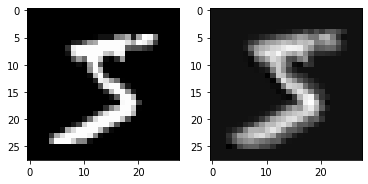

In [42]:
plt.subplot(121)
plt.imshow(image[0, :, :, 0], 'gray')
plt.subplot(122)
plt.imshow(output[0,:,:, 0], 'gray')
plt.show()

In [43]:
# weight 불러오기
weight = layer.get_weights()
weight

[array([[[[ 0.26455703, -0.03683615, -0.25627422, -0.19168687,
            0.19306311]],
 
         [[ 0.2952455 , -0.17912969,  0.3253518 , -0.00434884,
           -0.32804698]],
 
         [[-0.1696984 ,  0.14092198,  0.14218798,  0.27186325,
           -0.20427203]]],
 
 
        [[[-0.1809082 ,  0.15164518, -0.3322223 ,  0.10674778,
           -0.3210454 ]],
 
         [[ 0.27707306,  0.11195764, -0.10643117, -0.0245854 ,
            0.088411  ]],
 
         [[ 0.27402648,  0.05407429, -0.09541297,  0.03331318,
           -0.01025549]]],
 
 
        [[[ 0.28871158, -0.30140424,  0.05924383,  0.22923139,
           -0.11263125]],
 
         [[ 0.00734958, -0.00861701,  0.3052455 , -0.18316302,
            0.14574862]],
 
         [[ 0.17921534, -0.18121696,  0.10783139,  0.13427615,
           -0.20221035]]]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32)]

In [44]:
len(weight)

2

In [46]:
weight[0].shape, weight[1].shape

((3, 3, 1, 5), (5,))

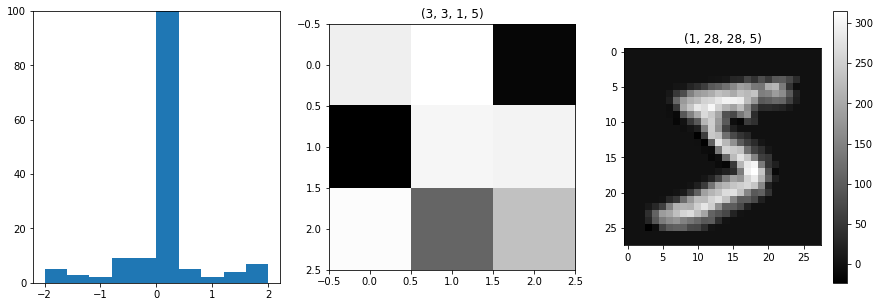

In [47]:
plt.figure(figsize= (15,5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)
plt.subplot(132)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,0], 'gray')
plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0,:,:,0], 'gray')
plt.colorbar()
plt.show()

### Activation function

In [48]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)

In [50]:
output.shape

TensorShape([1, 28, 28, 5])

In [51]:
act_output.shape

TensorShape([1, 28, 28, 5])

In [53]:
np.min(output), np.max(output)

(-214.51637, 314.91885)

In [52]:
np.min(act_output), np.max(act_output)

(0.0, 314.91885)

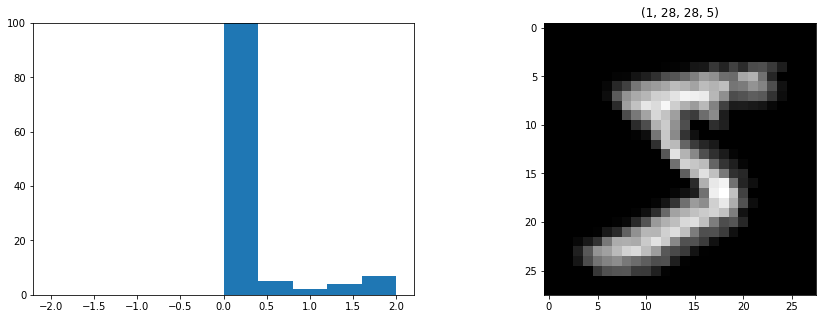

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(act_output.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(act_output.shape)
plt.imshow(act_output[0,:,:,0], 'gray')
plt.show()

## Pooling

In [59]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2), padding = 'SAME')
pool_output = pool_layer(act_output)

In [60]:
act_output.shape, pool_output.shape

(TensorShape([1, 28, 28, 5]), TensorShape([1, 14, 14, 5]))

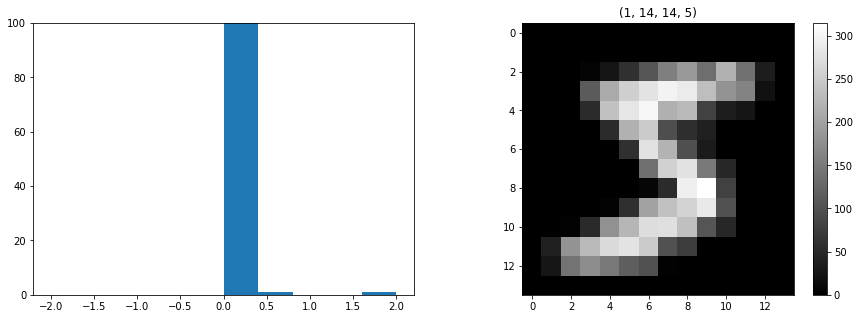

In [61]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(pool_output.shape)
plt.imshow(pool_output[0,:,:,0], 'gray')
plt.colorbar()
plt.show()

## Fully connected

## Flatten

In [62]:
import tensorflow as tf

In [63]:
tf.keras.layers.Flatten()

In [64]:
layer = tf.keras.layers.Flatten()

In [65]:
flatten = layer(output)

In [66]:
output.shape, flatten.shape

(TensorShape([1, 28, 28, 5]), TensorShape([1, 3920]))

In [68]:
28*28*5

3920

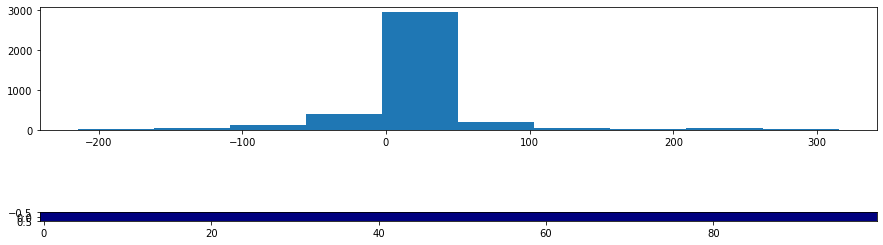

In [70]:
plt.figure(figsize=(15,5))
plt.subplot(211)
plt.hist(flatten.numpy().ravel())
plt.subplot(212)
plt.imshow(flatten[:,:100], 'jet')
plt.show()

## Dense

In [71]:
tf.keras.layers.Dense(32, activation ='relu')  #32 노드로 내보냄

In [73]:
layer = tf.keras.layers.Dense(32, activation='relu')

In [74]:
output = layer(flatten)

In [75]:
flatten.shape, output.shape

(TensorShape([1, 3920]), TensorShape([1, 32]))

In [76]:
layer_2 = tf.keras.layers.Dense(10, activation ='relu')
output_2 = layer_2(output)

In [77]:
output.shape, output_2.shape

(TensorShape([1, 32]), TensorShape([1, 10]))

## DropOut

In [79]:
layer = tf.keras.layers.Dropout(0.7)
output = layer(output)

In [80]:
output.shape

TensorShape([1, 32])

## Build Model

In [81]:
from tensorflow.keras import layers

In [82]:
input_shape = (28,28,1)  #input 크기 지정
num_classes = 10        # data class 갯수 지정

In [128]:
inputs = layers.Input(shape = input_shape, dtype = tf.float64)

# feature extraction
# 첫번째 convolution block
net = layers.Conv2D(32,(3,3), padding ='SAME')(inputs)  # 필터갯수, 필터사이즈
net = layers.Activation('relu')(net)
net = layers.Conv2D(32,(3,3), padding ='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D(pool_size = (2,2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Conv2D(64,(3,3), padding ='SAME')(net)  # 필터갯수, 필터사이즈
net = layers.Activation('relu')(net)
net = layers.Conv2D(64,(3,3), padding ='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D(pool_size = (2,2))(net)
net = layers.Dropout(0.5)(net)

# fully connected
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(10)(net) # 마지막 내보내는 노드 수 : 10
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs = inputs, outputs = net, name = 'Basic_CNN')


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [123]:
model

In [124]:
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_18 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 32)        0 

## Optimizing & Training (Beginner)

In [89]:
import tensorflow as tf 
from tensorflow.keras import layers

from tensorflow.keras import datasets

### prepare MNIST dataset

In [90]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

### optimization

In [91]:
# 모델을 학습하기 전 설정
# lossfuntion
# optimization
# metrics

### loss function

In [92]:
# categorical vs binary
loss = 'binary_crossentropy'
loss = 'categorical_crossentropy'

In [ ]:
# sparse_categorical_crossentropy vs categorical_crossentropy
tf.keras.losses.sparse_categorical_crossentropy

In [ ]:
tf.keras.losses.categorical_crossentropy

### metrics (모델을 평가하는 방법)

In [ ]:
# accuracy를 이름으로 넣는 방법
metrics = ['accuracy']
metrics = [tf.keras.metrics.Accuracy()]

In [ ]:
tf.keras.metrics.Accuracy()
tf.keras.metrics.Precision()
tf.keras.metrics.Recall()

### Compile

In [93]:
# optimizer 적용
# 'sgd'
# 'rmsprop'
# 'adam'

In [94]:
tf.keras.optimizers.SGD()
optm = tf.keras.optimizers.Adam()

In [129]:
model.compile(optimizer= tf.keras.optimizers.Adam(),
                loss = 'sparse_categorical_crossentropy',
                metrics= [tf.keras.metrics.Accuracy()])

## prepare dataset

In [95]:
# shpae 확인
# train_x 3차원
train_x.shape, train_y.shape

((60000, 28, 28), (60000,))

In [96]:
test_x.shape, test_y.shape

((10000, 28, 28), (10000,))

In [97]:
# 차원 수 늘리기
import numpy as np 
np.expand_dims(train_x, -1).shape

(60000, 28, 28, 1)

In [98]:
tf.expand_dims(train_x, -1).shape

TensorShape([60000, 28, 28, 1])

In [99]:
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]

In [100]:
train_x.shape, test_x.shape   # 마지막 차원 늘리기

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [101]:
# rescaling
np.min(train_x), np.max(train_x)

(0, 255)

In [102]:
train_x = train_x/255
test_x = test_x/255

In [103]:
np.min(train_x), np.max(train_x)

(0.0, 1.0)

## training (본격 학습하기)

In [105]:
# 학습용 hyperparameter 설정
# num_epochs
# batch_size

In [133]:
num_epochs = 1
batch_size = 32

In [134]:
# model fit
model.fit(train_x, train_y, batch_size= batch_size, shuffle=True, epochs = num_epochs)

TypeError: 'NoneType' object is not callable

## optimization & training(expert)

In [135]:
minist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = minist.load_data()

# channel 차원 추가
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# data normalization
x_train, x_test = x_train/255.0, x_test/255.0

In [136]:
# tf.data
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(1000)
train_ds = train_ds.batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(32)

In [137]:
# visualize data
import matplotlib.pyplot as plt 
%matplotlib inline

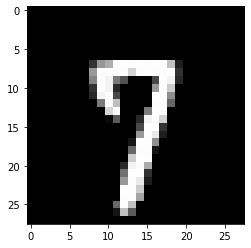

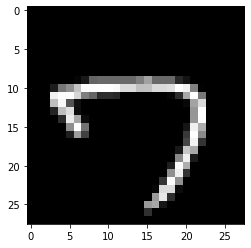

In [140]:
for image, label in train_ds.take(2):
    plt.imshow(image[0,:,:,0], 'gray')
    plt.show()

## training(keras)

In [144]:
# keras로 학습 할 때는 기존과 같지만, train_ds는 generator라서 그대로 넣을 수 있음
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy')
model.fit(train_ds, epochs=1)

1875/1875 [==============================] - 128s 68ms/step - loss: 0.1130


## Evaluationg

In [145]:
model.evaluate(test_x, test_y, batch_size=batch_size)

313/313 [==============================] - 4s 11ms/step - loss: 0.0403


0.040322545915842056

### 결과확인

In [146]:
test_image = test_x[0,:,:,0]
test_image.shape

(28, 28)

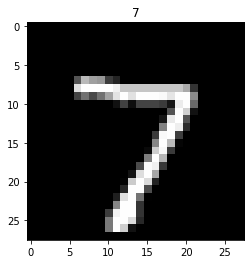

In [148]:
plt.title(test_y[0])
plt.imshow(test_image, 'gray')
plt.show()

In [149]:
pred = model.predict(test_image.reshape(1,28,28,1))

In [152]:
pred.shape

(1, 10)

In [153]:
pred

array([[3.5246453e-07, 1.7504226e-07, 6.1657347e-06, 5.9238232e-07,
        9.5176269e-08, 4.1136506e-08, 5.9894742e-11, 9.9997008e-01,
        1.7682663e-07, 2.2361106e-05]], dtype=float32)

In [154]:
np.argmax(pred)

7

## test batch

In [155]:
test_batch = test_x[:32]
test_batch.shape

(32, 28, 28, 1)

In [156]:
preds = model.predict(test_batch)

In [157]:
preds.shape

(32, 10)

In [158]:
np.argmax(preds,-1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 5, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1])

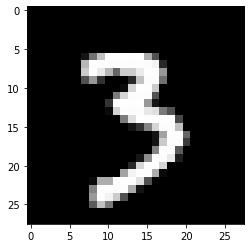

In [163]:
plt.imshow(test_batch[-2,:,:,0], 'gray')
plt.show()